## Shopify Data Science Intern Challenge

Completed by Phyo Win on January 15, 2022

### Question 1

Given some sample data, write a program to answer the following: click here to access the required data set
https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?

### Answer 1

The unexpectedly high AOV is due to two shops with unusually high order amounts. Excluding these outliers, we can calculate a more reasonable AOV of $300.

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Import the order data saved to computer
data_location = "C:/Users/Phyo Win/Downloads/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv"
df = pd.read_csv(data_location)

In [5]:
# Get summary statistics on the data set
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


The maximum order amount is $704,000 which seems like a bulk order that is not representative of the average customer order. We can sort the data set by order amount to check the outliers.

In [6]:
df.sort_values(by='order_amount', ascending=False).head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


Sorting the dataframe by the order_amount column, we can see that there are some large orders from shops 42. We can check the average order amount by shop to identify other abnormalities.

In [18]:
df['avg_amt_per_item'] = df.order_amount / df.total_items
df.groupby(['shop_id']).agg({'order_amount': 'mean', 
                             'total_items': 'sum', 
                             'avg_amt_per_item': ['min', 'max']}).sort_values(by=('order_amount', 'mean'), ascending=False).head(5)

order_amount total_items avg_amt_per_item         
                  mean         sum              min      max
shop_id                                                     
42       235101.490196       34063            352.0    352.0
78        49213.043478          88          25725.0  25725.0
50          403.545455          92            193.0    193.0
90          403.224490         111            178.0    178.0
38          390.857143          72            190.0    190.0

Shop 42 has extraordinary large order amounts while Shop 78 has very expensive items. While these could be luxury/designer items, they should be separated from the regular sneaker sales in analysis.

<AxesSubplot:>

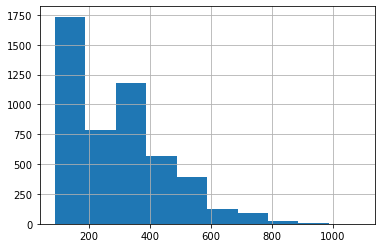

In [34]:
df.loc[~df['shop_id'].isin([78, 42]), 'order_amount'].hist()

Excluding the two outlier shops, we find that the order amounts are within a more compact range. I would report the average order value with the two shops excluded, i.e. $300 per order.

In [19]:
df.loc[~df['shop_id'].isin([78, 42]), 'order_amount'].mean()

300.1558229655313